<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/section_%5B1_1%5D_Options_Market_Based_Valuation_Derivatives_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams['font.family'] = 'serif'

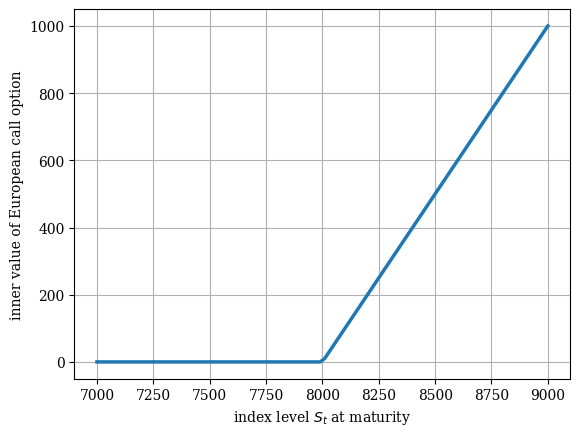

In [ ]:
# Option Strike
K = 8000
# Graphical Output
S = np.linspace(7000, 9000, 100) # index level values
h = np.maximum(S - K, 0) # inner values of call option
plt.figure()
plt.plot(S, h, lw=2.5) # plot inner values at maturity
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)

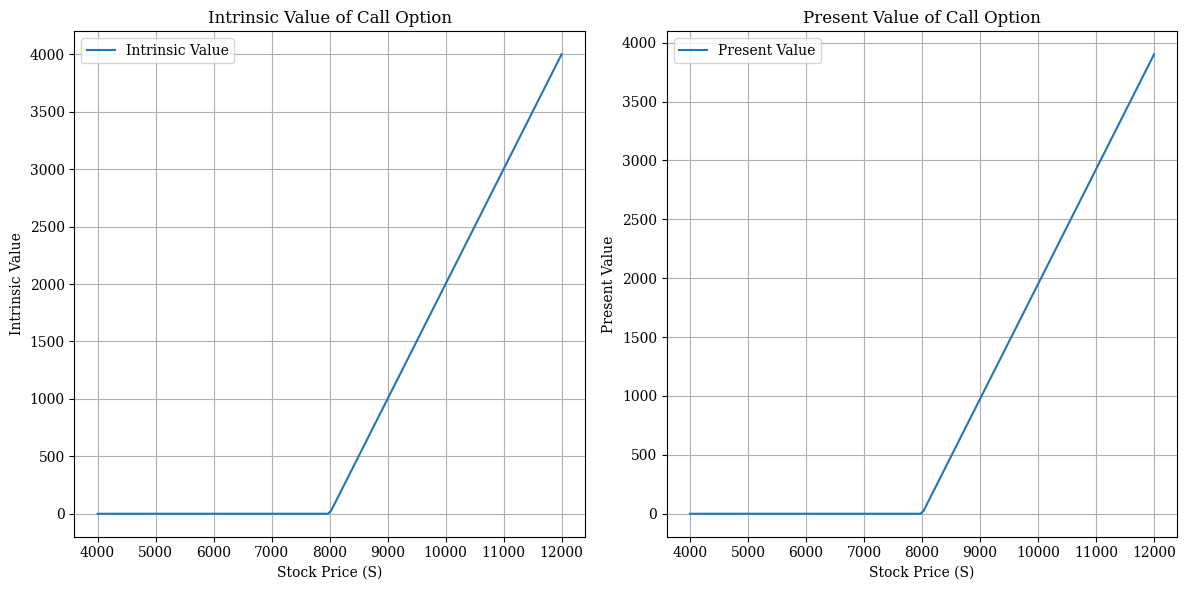

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bsm_call_option(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Model and Option Parameters
K = 8000  # strike price
T = 1.0   # time-to-maturity
r = 0.025 # constant, risk-less short rate
vol = 0.2 # constant volatility

# Generate a range of stock prices
S_values = np.linspace(4000, 12000, 150)

# Calculate call option values, intrinsic values, and present values
call_option_values = [bsm_call_option(S0, K, T, r, vol) for S0 in S_values]
intrinsic_values = np.maximum(S_values - K, 0)
present_values = [iv * np.exp(-r * T) for iv in intrinsic_values]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(S_values, intrinsic_values, label='Intrinsic Value')
plt.title('Intrinsic Value of Call Option')
plt.xlabel('Stock Price (S)')
plt.ylabel('Intrinsic Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(S_values, present_values, label='Present Value')
plt.title('Present Value of Call Option')
plt.xlabel('Stock Price (S)')
plt.ylabel('Present Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
